Accuracy: 90.93333333333334 %
Probabilities: [4.72064583e-02 6.08980665e-04 9.80651723e-01 ... 2.51395437e-03
 8.51868388e-01 1.65281389e-03]


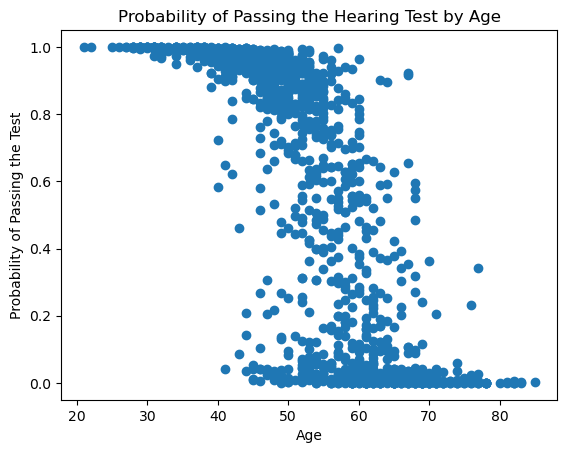

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('hearing_test.csv')


X = df[['age', 'physical_score']]
y = df['test_result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

probabilities = model.predict_proba(X_test_scaled)[:, 1]
print("Probabilities:", probabilities)

plt.scatter(X_test['age'], probabilities)
plt.xlabel('Age')
plt.ylabel('Probability of Passing the Test')
plt.title('Probability of Passing the Hearing Test by Age')
plt.show()